In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Se recuerdan las ecuaciones de Margules para un sistema binario:

$$\ln{\gamma_1}=x_2^2\cdot\left[A_{12}+2\cdot\left(A_{21}-A_{12}\right)\cdot x_1\right]$$

$$\ln{\gamma_2}=x_1^2\cdot\left[A_{21}+2\cdot\left(A_{12}-A_{21}\right)\cdot x_2\right]$$

De los datos brindados en el problema, se pueden utilizar los valores de $\ln{\gamma_1}$ y de $x_1$ y $x_2$ para realizar una regresión no lineal que permita estimar los valores de $A_{12}$ y $A_{21}$

In [2]:
def MargulesEquation1(x1,A12,A21):
    x2=1-x1
    return x2**2*(A12+2*x1*(A21-A12))
def MargulesEquation2(x1,A12,A21):
    x2=1-x1
    return x1**2*(A21+2*x2*(A12-A21))

In [3]:
df=pd.read_csv("DatosProblema3Tarea5.csv",sep="\t",decimal=",")

In [5]:
coefs,_=curve_fit(MargulesEquation1,df.x1[1:],df.lnY1[1:])

In [6]:
A12=coefs[0]
A21=coefs[1]

In [10]:
df["lnY2"]=MargulesEquation2(df.x1,A12,A21)

Se sabe, de la ecuación 11.69 del libro que:

$$\frac{G^E}{RT}=x1\ln{\gamma_1}+x_2\ln{\gamma_2}$$

In [12]:
df["GE/RT"]=df.x1*df.lnY1+(1-df.x1)*df.lnY2

In [13]:
df["GE/RTx1x2"]=df["GE/RT"]/(df.x1*(1-df.x1))

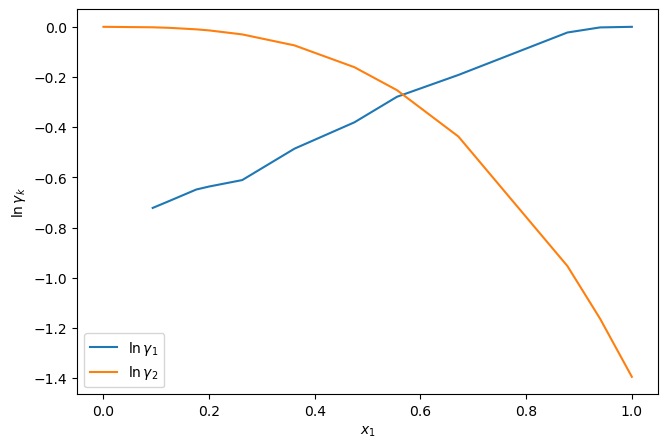

In [16]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df.lnY1)
plt.plot(df.x1,df.lnY2)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$\ln{\gamma_k}$")
plt.legend([r"$\ln{\gamma_1}$",r"$\ln{\gamma_2}$"])
plt.show()

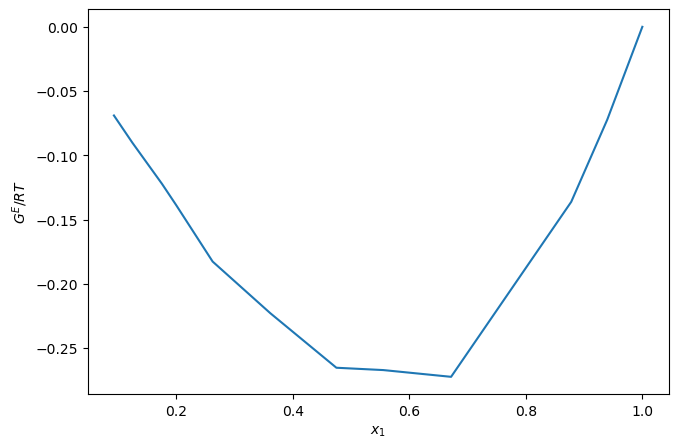

In [18]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df["GE/RT"])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$G^E/RT$")
plt.show()

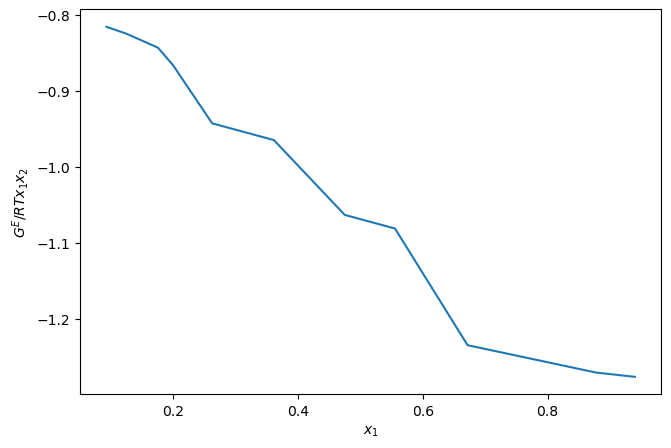

In [19]:
plt.figure(figsize=(7.5,5))
plt.plot(df.x1,df["GE/RTx1x2"])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$G^E/RTx_1x_2$")
plt.show()